In [1]:
# !pip install ipywidgets==8.0.4
# jupyter nbextension enable --py widgetsnbextension
# !pip install voila

In [2]:
import pandas as pd
import joblib

#packages for analysis/modeling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Data-Sets/main/churn.csv')

#Prepare the data by separating the features and the target variable:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'
X = data[features]
y = data[target]

# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)  # Converts categorical variables to numeric using one-hot encoding



#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf, 'model.pkl')

# Feature Importance ranks
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Test the accuracy of the Random Forest classifier on the test set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



# function that takes user inputs and predicts customer churn
def predict_churn(credit_score=None, geography=None, gender=None, age=None, tenure=None, balance=None, num_of_products=None, has_cr_card=None, is_active_member=None, estimated_salary=None):
    # Create a DataFrame with the user inputs
    user_data = pd.DataFrame([[credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary]],
                             columns=features)

    # Convert categorical variables to numeric using one-hot encoding
    user_data_encoded = pd.get_dummies(user_data, drop_first=True)

    # Align the user input DataFrame with the training DataFrame to ensure matching columns
    user_data_aligned = user_data_encoded.reindex(columns=X.columns, fill_value=0)

    # Make predictions using the trained classifier
    churn_prediction = rf.predict(user_data_aligned)

    return churn_prediction[0]

# prediction = predict_churn(age=40, balance=5000, is_active_member=0, estimated_salary=50000)
# print(f"Churn Prediction:", prediction)
# if prediction > 0:
#     print("lost customer.")
# else:
#     print("retained customer!")

print(feature_importances)
print("----------------------")
print(accuracy)

              Feature  Importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421
9     Geography_Spain    0.013214
----------------------
0.8665


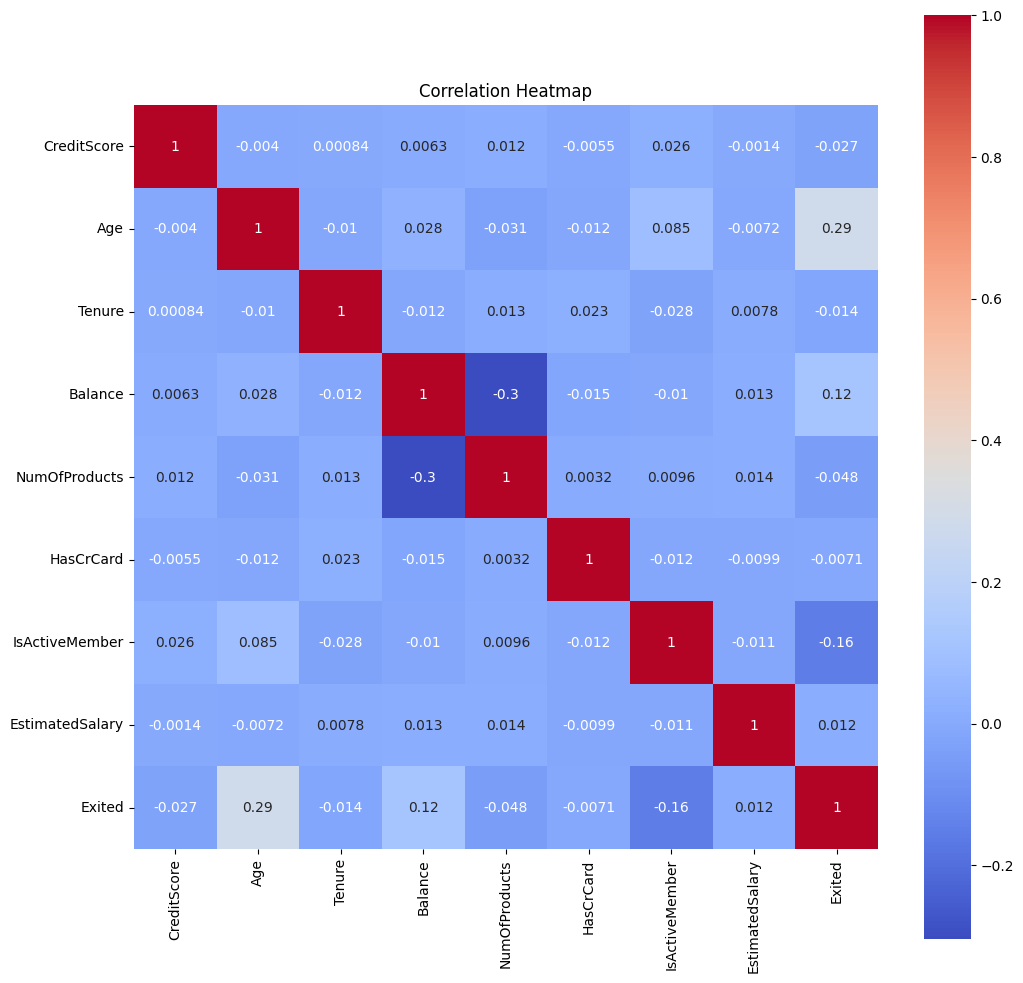

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in the variable 'df'
columns = ['CreditScore', 'Age', 'Tenure',
           'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
           'EstimatedSalary', 'Exited']

# Subset the dataset to include only the selected columns
subset_df = data[columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')
plt.show()


In [4]:
import pandas as pd
import joblib
import ipywidgets as widgets
import numpy as np

from IPython.display import display, HTML

# Define the title and description HTML
title_html = """
<h2>Predict Churned Customers by Internal/External Factors</h2>
<p>In this model, several characteristics are used to predict whether a customer will exit their bank:</p>
<ul>
    <li>Geography — a customer’s location can affect their decision to leave the bank</li>
    <li>Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank</li>
    <li>Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones</li>
    <li>Tenure — refers to number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank</li>
    <li>Balance — people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances</li>
    <li>NumOfProducts — refers to the number of products that a customer has purchased through the bank</li>
    <li>HasCrCard — denotes whether or not a customer has a credit card and people with a credit card are less likely to leave the bank</li>
    <li>IsActiveMember — active customers are less likely to leave the bank</li>
    <li>EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries</li>
    <li>Exited — whether or not the customer left the bank</li>
</ul>
<p>Using these features, a RandomForestClassifier is able to very closely predict the customer churn. Try it and see!</p>
<hr>
"""


# Display the title and description
display(HTML(title_html))

# Load the trained model
rf = joblib.load('model.pkl')

# Create the interactive widgets for user inputs
credit_score_widget = widgets.IntSlider(min=0, max=1000, step=1, description='Credit Score', layout=widgets.Layout(width='auto'))
tenure_widget = widgets.IntSlider(min=0, max=10, step=1, description='Tenure', layout=widgets.Layout(width='auto'))
balance_widget = widgets.FloatSlider(min=0, max=250000, step=100, description='Balance', layout=widgets.Layout(width='auto'))
num_of_products_widget = widgets.IntSlider(min=1, max=4, step=1, description='Products', layout=widgets.Layout(width='auto'))
has_cr_card_widget = widgets.Checkbox(description='Has Credit Card', layout=widgets.Layout(width='auto',margin='20px 0 0 50px'))
is_active_member_widget = widgets.Checkbox(description='Is Active Member', layout=widgets.Layout(width='auto',margin='20px 0 0 50px'))
estimated_salary_widget = widgets.FloatSlider(min=0, max=200000, step=1000, description='Salary', layout=widgets.Layout(width='auto'))
age_widget = widgets.IntSlider(min=18, max=100, step=1, description='Age', layout=widgets.Layout(width='auto'))
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender', layout=widgets.Layout(width='auto'))
geography_widget = widgets.Dropdown(options=['France', 'Germany', 'Spain'], description='Geography', layout=widgets.Layout(width='auto'))
# Create a function that updates the churn prediction based on the user inputs
def update_prediction(credit_score, tenure, balance, num_of_products, estimated_salary, age, geography, gender, has_cr_card, is_active_member):
    prediction = predict_churn(credit_score, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary, age, geography, gender)
    if prediction > 0:
        result_widget.value = "Lost customer"
    else:
        result_widget.value = "Retained customer"


# Create the result widget to display the churn prediction
result_widget = widgets.Label()

# Create the interactive interface using the `interact` function
interact_func = widgets.interact(
    update_prediction,
    credit_score=credit_score_widget,
    tenure=tenure_widget,
    balance=balance_widget,
    num_of_products=num_of_products_widget,
    has_cr_card=has_cr_card_widget,
    is_active_member=is_active_member_widget,
    estimated_salary=estimated_salary_widget,
    age=age_widget,
    gender=gender_widget,
    geography=geography_widget,
)
result_html ='''
'''
display(HTML(result_html))

pred_html = f"""
      <hr>
      <h2> Model Predicts... </h2>

"""

display(HTML(pred_html))

# Display the result widget
display(result_widget)



interactive(children=(IntSlider(value=0, description='Credit Score', layout=Layout(width='auto'), max=1000), I…

Label(value='Lost customer')